# OrionKL test with method 1

In [1]:
%matplotlib inline

import os
import sys
import copy
import numpy as np

# filtering Astropy warnings
import warnings
from astropy.utils.exceptions import AstropyWarning
warnings.simplefilter('ignore', category=AstropyWarning)

# autoreload user modules functionality
%load_ext autoreload
%autoreload 2

sys.path.append('../lib/')
from hdmclouds_v1 import *
from utils import *
from graph import *
from preprocessing import *
from gmr import *

from ipywidgets import interact, interactive, fixed, FloatSlider, IntSlider
import matplotlib
import matplotlib.pyplot as plt; plt.show()
matplotlib.rcParams.update({'font.size': 13})

#from pycupid import *

save_path = "/Users/martin/Dropbox/Aplicaciones/ShareLaTeX/HDMC-v1/figures/"

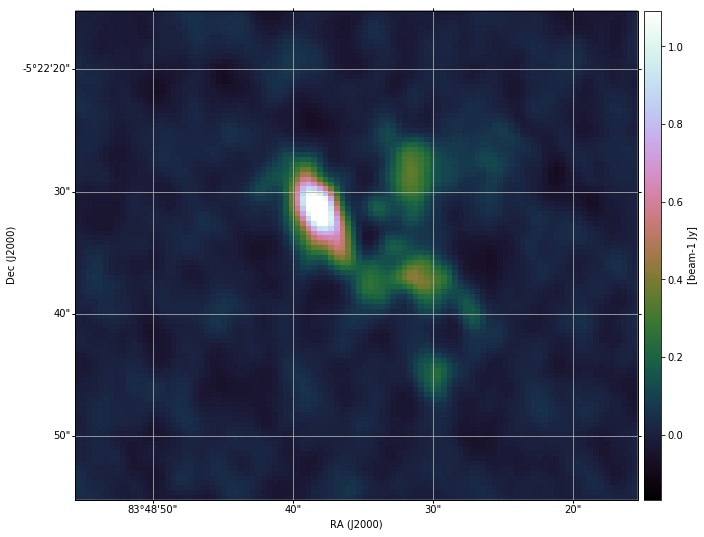

In [2]:
fits_path = '../data/images/Orion.cont.image.fits'
#fits_path = '../data/images/OphA_ExtnCambR_F.fits'
#fits_path = '../data/images/PerA_Extn2MASS_F_Gal.fits'
#fits_path = '../data/images/RhoOphiuchus60.fits'
#fits_path = '../data/images/perseus60.fits'
#fits_path = '../data/SCIMES/orion_12CO_mom0.fits'

data,wcs,hdu,spec = load_data(fits_path)
base_level = estimate_rms(data)
image_plot(data, wcs=wcs, unit=hdu.header["BUNIT"], save_path="./orion_12CO_mom0.png")

In [3]:
preprocessing(data, wcs)

interactive(children=(FloatSlider(value=0.10237737624469602, description='back_level', max=0.20475475248939204…

[INFO] Number of usable pixels: 749


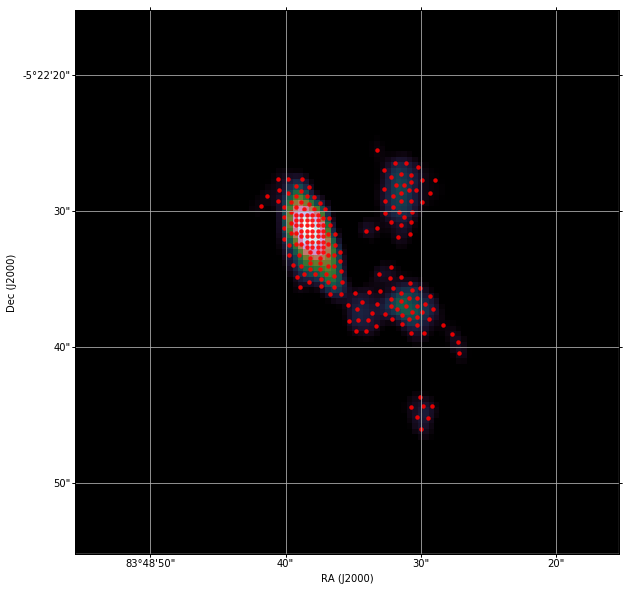

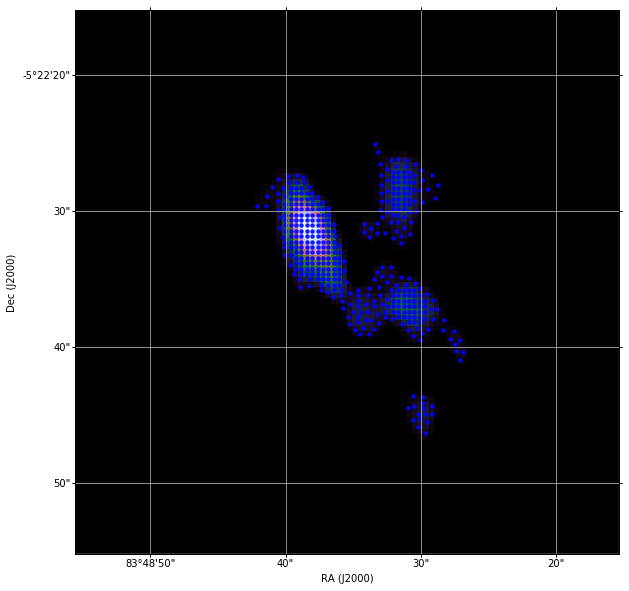

In [4]:
hdmc = HDMClouds(data, back_level=0.089, wcs=wcs, verbose=True, n_center=200)

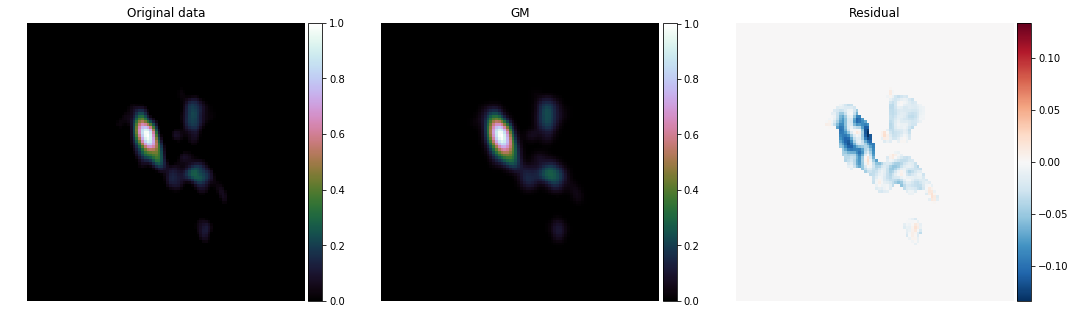

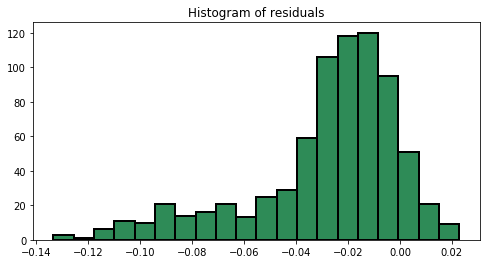

RESIDUAL STATS
RMS of residual: 0.011007130683133456
Inf norm of residual: 0.13341142473260748
Variance of residual: 0.00011671337733728152
Normalized flux addition: 0.19331486375996215
Normalized flux lost: 0.00489393858304094


In [5]:
hdmc.get_residual_stats();

In [6]:
%%prun -s tottime -q -l 30 -T hdmc_m1_prof
hdmc.build_gmr()

 
*** Profile printout saved to text file 'hdmc_m1_prof'. 


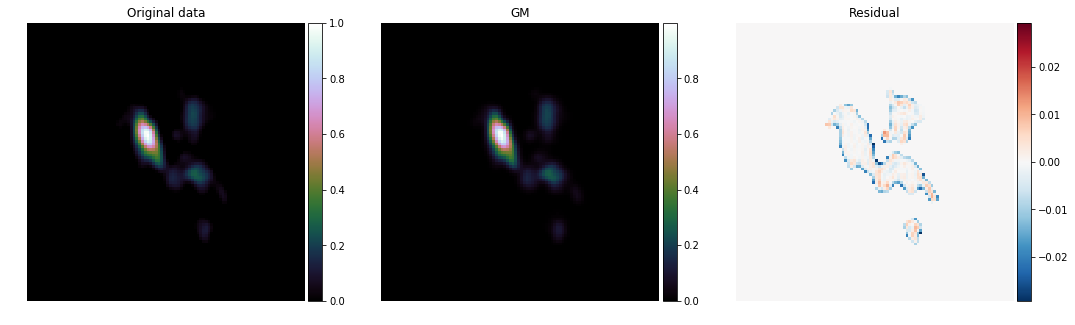

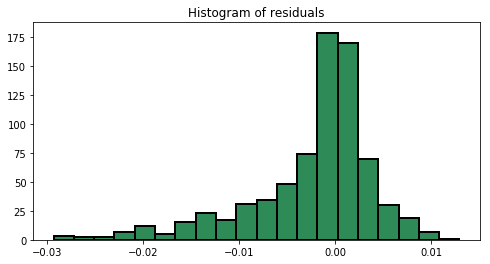

RESIDUAL STATS
RMS of residual: 0.0018631190723053742
Inf norm of residual: 0.029297422804908685
Variance of residual: 3.4442473620852285e-06
Normalized flux addition: 0.022205557768349055
Normalized flux lost: 0.007527556506333253


In [7]:
hdmc.get_residual_stats();

In [8]:
hdmc.solver_output()

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 80200.
nfev: 80226
xtol: 1e-07
ftol: 1e-07


In [9]:
print("Elapsed time {0}".format(hdmc.elapsed_time))

Elapsed time 191.36658811569214


In [10]:
w,sig = hdmc.get_params_mapped()

print("PARAMETERS VARIATION:")
print("w variation: ",np.max(np.abs(hdmc.w0-w)))
print("sig variation: ",np.max(np.abs(hdmc.sig0-sig)))

PARAMETERS VARIATION:
w variation:  0.13395616155063358
sig variation:  0.014067197792200201


#### Profiling results

In [11]:
print(open('hdmc_m1_prof', 'r').read())

         5540341 function calls (5538129 primitive calls) in 191.367 seconds

   Ordered by: internal time
   List reduced from 135 to 30 due to restriction <30>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    80228  149.666    0.002  149.666    0.002 {fgm_eval.gm_eval2d_2}
        1   19.391   19.391  191.356  191.356 {built-in method scipy.optimize._minpack._lmdif}
   240684    6.366    0.000   12.720    0.000 necompiler.py:751(evaluate)
    80228    4.551    0.000    8.352    0.000 hdmclouds_v1.py:34(d1psi1)
    80228    2.730    0.000    2.730    0.000 utils.py:149(sig_mapping)
    80228    2.036    0.000  171.976    0.002 hdmclouds_v1.py:406(F)
   240684    1.562    0.000    2.593    0.000 necompiler.py:726(getArguments)
   240687    1.502    0.000    1.980    0.000 necompiler.py:535(getContext)
   481368    0.628    0.000    0.628    0.000 necompiler.py:687(getType)
   481378    0.550    0.000    0.550    0.000 {built-in method numpy.core.multiarray.a

***